In [2]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['figure.figsize'] = (12.0,6.0)


In [3]:
DATA_DIRS = '/mnt/cat/data/sandy/Forecasting/data/'

In [4]:
files_path = os.path.join(DATA_DIRS, 'energy-anomaly-detection')

In [17]:
train = pd.read_csv(os.path.join(files_path, 'train.csv'))
train_features = pd.read_csv(os.path.join(files_path, 'train_features.csv'))

In [18]:
print(train['building_id'].unique())

[   1   32   41   55   69   79   82   91  107  108  111  112  117  118
  119  121  136  137  139  141  144  147  148  149  159  171  173  174
  181  183  190  235  238  240  246  247  248  253  254  263  270  275
  276  278  290  293  312  318  335  345  356  423  439  492  534  560
  623  653  657  658  666  667  673  675  677  680  683  685  687  693
  697  698  701  708  710  721  722  729  730  732  739  742  801  827
  844  848  879  880  881  882  884  886  887  889  890  892  893  894
  895  896  903  905  909  914  919  922  924  925  926  928  929  931
  935  936  941  942  945  948  950  952  961  966  967  968  969  970
  971  973  974  975  977  978  981  988  990  992  994  996 1001 1007
 1068 1073 1074 1106 1120 1128 1137 1141 1143 1147 1172 1219 1225 1226
 1230 1232 1234 1238 1239 1241 1242 1245 1246 1247 1249 1251 1252 1253
 1255 1257 1258 1259 1260 1261 1264 1266 1267 1272 1275 1278 1279 1283
 1284 1285 1296 1297 1300 1302 1303 1304 1306 1309 1310 1311 1315 1316
 1318 

In [69]:
train_blding = train[train['building_id']==1315].interpolate(method='linear',limit_direction='both')
print(len(train_blding))
print(len(train_blding[train_blding['meter_reading'].isna()]))

8784
0


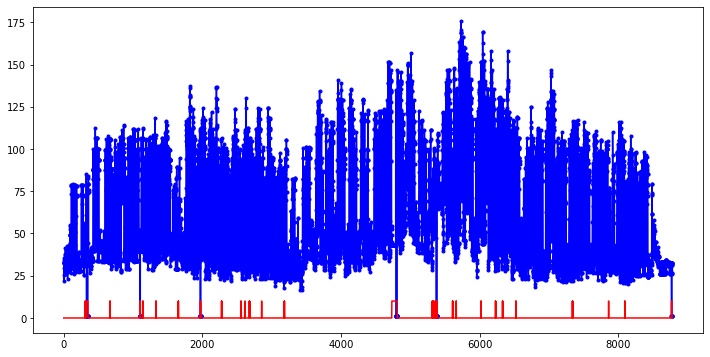

In [70]:
plt.plot(train_blding['meter_reading'].values,"b.-")
plt.plot(train_blding['anomaly'].values*10,'r')

In [ ]:
plt.plot(train_blding['meter_reading'][6000:8000].values,"b.-")
plt.plot(train_blding['anomaly'][6000:8000].values*100,'r')

In [71]:
px.line(train_blding['meter_reading'].values)

In [54]:
train_blding.iloc[5000:6000]

,building_id,timestamp,meter_reading,anomaly
999011,922,2016-07-27 23:00:00,108.0,0
999210,922,2016-07-28 00:00:00,100.0,0
999409,922,2016-07-28 01:00:00,99.0,0
999608,922,2016-07-28 02:00:00,95.0,0
999807,922,2016-07-28 03:00:00,88.0,0
...,...,...,...,...
1197007,922,2016-09-07 10:00:00,186.0,0
1197207,922,2016-09-07 11:00:00,196.0,0
1197407,922,2016-09-07 12:00:00,198.0,0
1197606,922,2016-09-07 13:00:00,198.0,0


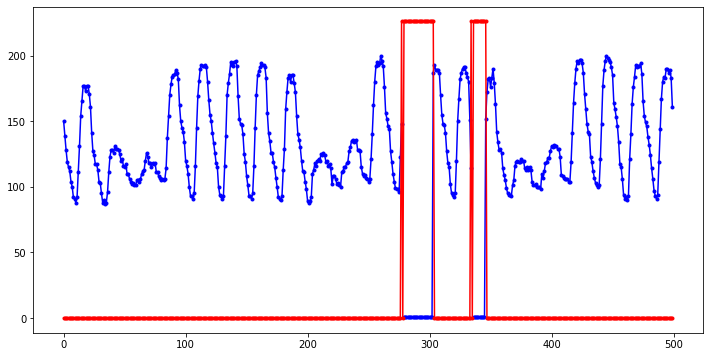

226.0


In [61]:
plt.plot(train_blding['meter_reading'].values[1000:1500], 'b.-')
vals = train_blding['meter_reading'].values
maxval = np.nanmax(vals)
plt.plot(train_blding['anomaly'].values[1000:1500]*maxval, 'r.-')
plt.show()
print(maxval)